# Problem Statement
Predict the bike-sharing counts per hour based on features including weather, day, time, humidity, wind speed, season e.t.c.


# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Loading Data

In [2]:
bikeshare = pd.read_csv('hour.csv')
bikeshare.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# EDA & Visualization


### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<AxesSubplot:xlabel='hr'>

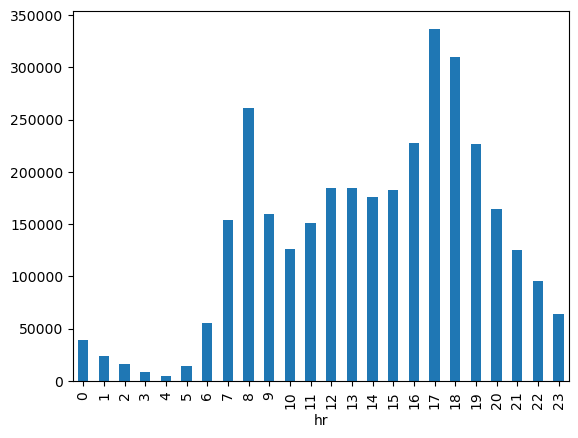

In [4]:
bikeshare.groupby('hr').sum('cnt')['cnt'].plot.bar()

### Visualize the distribution of count, casual and registered variables

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


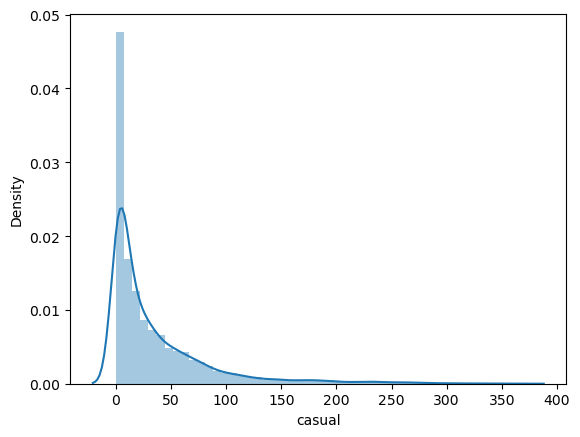

In [5]:
# distribution of casual
sns.distplot(bikeshare.casual);

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


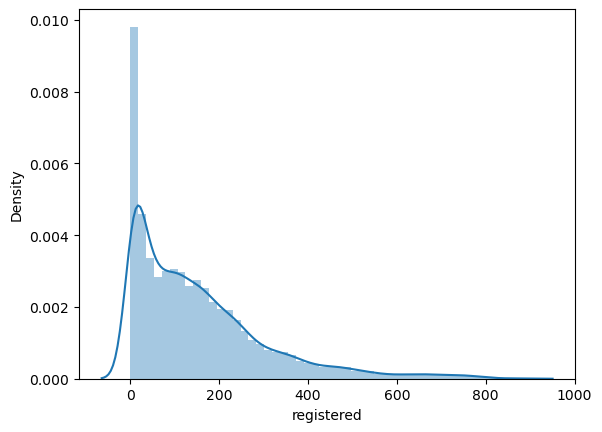

In [6]:
# distribution of registered
sns.distplot(bikeshare.registered);

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


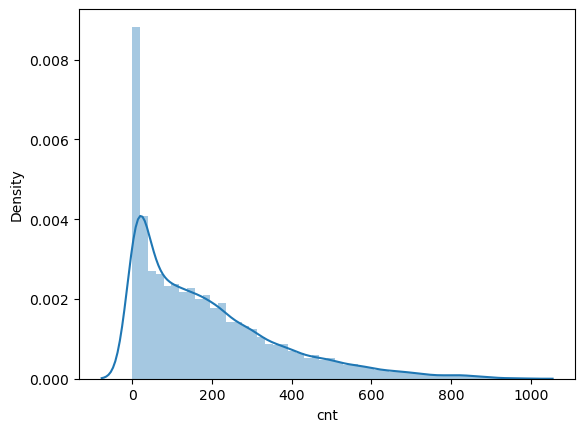

In [7]:
# distribution of count
sns.distplot(bikeshare.cnt);

### Describe the relation of weekday, holiday and working day

In [8]:
# Working days from 1-5 (mon-fri)
bikeshare[bikeshare.workingday==1].weekday.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
# Holiday possible on working days
bikeshare[bikeshare.holiday==1].weekday.unique()

array([1, 5, 4, 3, 2], dtype=int64)

In [10]:
# Not a holiday, not a working day (Sun, Sat)
bikeshare[(bikeshare.holiday==0) & (bikeshare.workingday==0)].weekday.unique()

array([6, 0], dtype=int64)

### Visualize the monthly wise count of both casual and registered for the year 2011 and 2012 separately

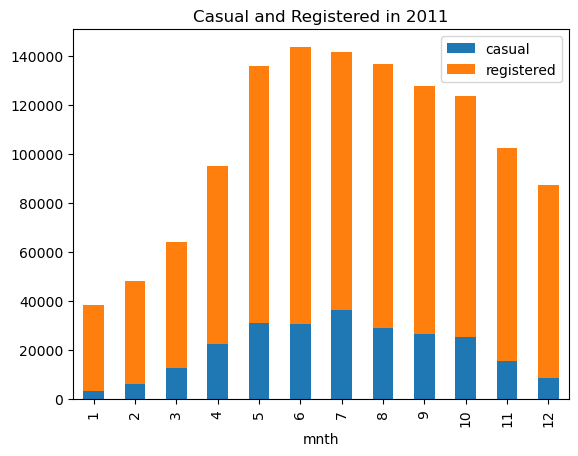

In [11]:
# stacked bar chart for year 2011
bikeshare[bikeshare.yr==0].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(stacked=True);
plt.title("Casual and Registered in 2011")
plt.show()

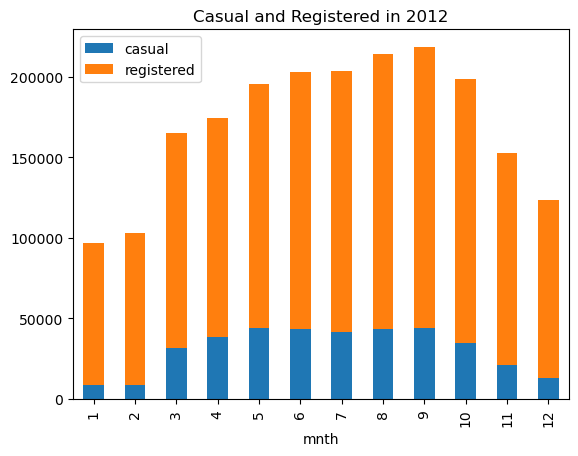

In [12]:
# stacked bar chart for year 2012
bikeshare[bikeshare.yr==1].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(stacked=True)
plt.title("Casual and Registered in 2012")
plt.show()

### Analyze the correlation between features with heatmap

<AxesSubplot:>

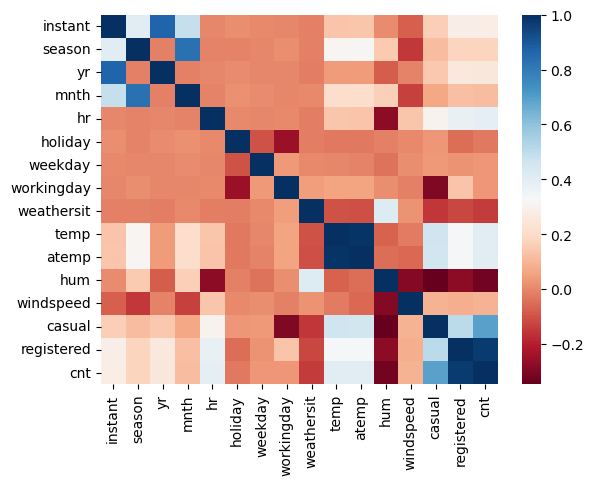

In [13]:
sns.heatmap(bikeshare.iloc[:,:].corr(), cmap='RdBu')

### Visualize the box plot of casual and registered variables to check the outliers

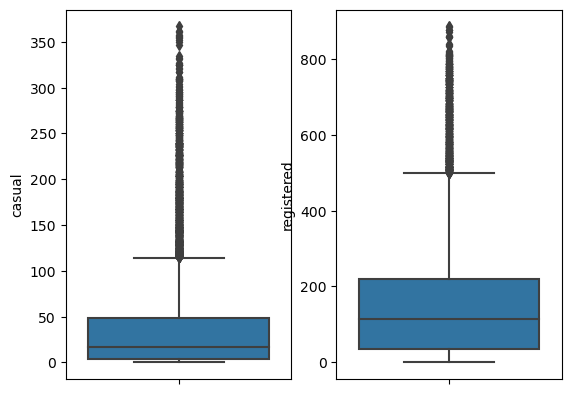

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.boxplot(data=bikeshare,y="casual",orient="v",ax=axes[0])
sns.boxplot(data=bikeshare,y="registered",orient="v",ax=axes[1])
plt.show()

# Pre-processing and Data Engineering

In [15]:
bikeshare1 = bikeshare.drop(['instant', 'dteday'], axis = 1)
bikeshare1.shape

(17379, 15)

### Identify categorical and continuous variables

In [16]:
# Identifying categorical and continuous variables
cont_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season', 'yr', 'mnth','hr','holiday','weekday','weathersit']

### Feature scaling
Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

In [17]:
std_scaler = StandardScaler()
scaled_data = pd.DataFrame(std_scaler.fit_transform(bikeshare1[cont_features]), columns = cont_features)
scaled_data.shape

(17379, 4)

In [18]:
# scaled features + categorical in one dataframe
scaled_data
for i in categorical_features:
    scaled_data[i] = bikeshare1[i].values
scaled_data.head(2)

,temp,atemp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,weathersit
0,-1.334648,-1.093281,0.947372,-1.553889,1,0,1,0,0,6,1
1,-1.438516,-1.181732,0.895539,-1.553889,1,0,1,1,0,6,1


### Apply one-hot encode on the categorical data
One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories

In [19]:
onehot = OneHotEncoder()
onehot_encoded = onehot.fit_transform(scaled_data[categorical_features]).toarray()
onehot_encoded.shape

(17379, 55)

In [20]:
onehot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [21]:
cat_features = onehot.get_feature_names_out().tolist()

In [22]:
feature_names = cont_features + cat_features
feature_names

['temp',
 'atemp',
 'hum',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'yr_0',
 'yr_1',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'holiday_0',
 'holiday_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

### Specify features and targets after applying scaling and one-hot encoding

In [23]:
features = np.concatenate((scaled_data[['temp','atemp','hum','windspeed']].values, onehot_encoded), axis=1)
features.shape

(17379, 59)

In [24]:
target = bikeshare1[['casual','registered','cnt']]
target.shape

(17379, 3)

### Feature scaling and One-hot encoding using Pipeline

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create pipeline to Scale numerical features
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),             # to handle missing values if any
                         ('std_scaler', StandardScaler())
                         ])

from sklearn.compose import ColumnTransformer
''' ColumnTransformer applies each transformer to the appropriate columns and concatenates the outputs along the second axis. ''' 
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, cont_features),                 ## cont_features = ['temp','atemp','hum','windspeed']
                                   ("cat", OneHotEncoder(), categorical_features)])      ## categorical_features = ['season', 'yr', 'mnth','hr','holiday','weekday','weathersit']

features1 = full_pipeline.fit_transform(bikeshare1).toarray()
features1.shape

(17379, 59)

### Select the features and target and split the dataset

In [26]:
target1 = bikeshare1[['cnt']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, target1)
x_train.shape, y_train.shape

((13034, 59), (13034, 1))

### Implementation using Normal Equation

In [28]:
y = y_train.values
# Adding ones to X
X = np.append(np.ones((x_train.shape[0],1)),x_train, axis=1)
X.shape

(13034, 60)

In [29]:
# X_transpose * X
X_t = np.transpose(X)
X_Xt_dot = X_t.dot(X)

# inverse of (X * X_transpose)
temp1 = np.linalg.inv(X_Xt_dot)
temp1.shape

(60, 60)

In [30]:
# X_transpose * Y
temp2 = X_t.dot(y)
# Inverse of (X_transpose * X) * (X_transpose * Y)
coefs = temp1.dot(temp2)
coefs.shape

(60, 1)

In [31]:
# Above steps in one line
y = y_train.values
X_b = np.concatenate((np.ones((x_train.shape[0], 1)), x_train),axis=1)
theta_star = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_star.shape

(60, 1)

In [32]:
ypredict = X_b.dot(theta_star.ravel())
mean_squared_error(ypredict, y_train.values)

135434929.73778903

In [33]:
def Calc_MSE(X, y_test, coefficients):

    X = np.append(np.ones((X.shape[0],1)),X, axis=1)
    score = mean_squared_error(y_test.values, X.dot(coefficients))
    return score

In [34]:
# objective(X,y, coefs)
train_error = Calc_MSE(x_train, y_train, coefs)
test_error = Calc_MSE(x_test, y_test, coefs)
train_error, test_error

(191687534.22876415, 205465499.05100533)

In [35]:
from scipy.linalg import lstsq

x_train, x_test, y_train, y_test = train_test_split(features, target1)
y = y_train.values
X = np.append(np.ones((x_train.shape[0],1)),x_train, axis=1)
p, res, rnk, s = lstsq(X, y)
print(np.sum((X.dot(p)-y)**2)/X.shape[0])

10407.879756772778


### Implementing Linear regression using batch gradient descent

In [36]:
X = x_train
y = y_train
# Adding ones to X
X = np.append(np.ones((X.shape[0],1)),X, axis=1)
X.shape

(13034, 60)

In [37]:
def cost_function(X, Y, B):
  return mean_squared_error(Y, X.dot(B))

In [40]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  for iteration in range(iterations):
    #print(iteration)
    h = X.dot(B)
    loss = h - Y #change the variable name
    gradient = X.T.dot(loss) / m
    B = B - alpha * gradient
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost
  return B, cost_history

B = np.random.randn(X.shape[1])
alpha = 0.005
iter_ = 50000
newB, cost_history = batch_gradient_descent(X, y.values.ravel(), B, alpha, iter_)
newB, cost_history[-1]

(array([ 5.70750415e+01,  2.15046566e+01,  2.34635354e+01, -1.59606177e+01,
        -3.76404726e+00, -2.28550338e+01,  2.40066031e+01,  1.42954047e+01,
         4.21931689e+01, -1.38850994e+01,  7.15238961e+01,  1.65230018e+00,
         5.41864620e+00,  1.48061740e+01, -1.13316855e+00,  1.38282067e+01,
        -9.07667365e-01, -1.78261452e+01,  2.84378432e+00,  3.22179141e+01,
         1.57893943e+01, -5.14648591e+00, -3.30460819e+00, -1.23648747e+02,
        -1.39519295e+02, -1.46299237e+02, -1.59231421e+02, -1.63328559e+02,
        -1.43373582e+02, -8.62172397e+01,  4.76765130e+01,  1.86910221e+02,
         4.14772865e+01, -1.11593395e+01,  1.24115641e+01,  5.09044206e+01,
         4.59735547e+01,  3.29681168e+01,  4.02927662e+01,  1.01375201e+02,
         2.54624155e+02,  2.24055794e+02,  1.15523038e+02,  3.41288427e+01,
        -1.34748782e+01, -5.09597606e+01, -9.08556439e+01,  3.67554099e+01,
         1.89650263e+01, -2.67592188e+00,  7.98120773e+00,  8.07319180e+00,
         9.4

In [39]:
# test error
X_test = np.append(np.ones((x_test.shape[0],1)),x_test, axis=1)
cost_function(X_test,y_test, newB)

10090.543594105622

###  SGD Regressor

In [41]:
sgd = linear_model.SGDRegressor()
sgd = sgd.fit(x_train, y_train)
print("score is ",sgd.score(x_test, y_test))
mean_squared_error(sgd.predict(x_test), y_test )

C:\Users\Komal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score is  0.6887489656825345


10104.49430256929

# Linear regression using sklearn

### Select the features and split the data into train and test

In [42]:
target2 = bikeshare1['cnt']

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target1)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 1))

In [44]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(xtrain, ytrain)
predicted = regr_linear.predict(xtest)

### Calculate the mean squared error of the actual and predicted data

In [45]:
mse_linear = mean_squared_error(ytest, predicted, multioutput = 'uniform_average')
mse_linear

9593.164055644958

### Calculate the  R2  (coefficient of determination) of the actual and predicted data

In [46]:
r2_score(ytrain, regr_linear.predict(xtrain)), r2_score(ytest, predicted)

(0.6789501369760775, 0.7074279281736036)

# Regularization methods

### Apply lasso regression
Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
Calculate the metrics for the actual and predicted

In [47]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [48]:
for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(xtrain, ytrain)
    mse_lasso_sk = mean_squared_error(ytest, regr_lasso.predict(xtest), multioutput = 'uniform_average')
    print(a, "=====",mse_lasso_sk) 

C:\Users\Komal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.618e+06, tolerance: 4.293e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ===== 9593.168807906513


C:\Users\Komal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.094e+05, tolerance: 4.293e+04
  model = cd_fast.enet_coordinate_descent(


0.001 ===== 9591.662815482614
0.01 ===== 9583.258721825378
0.1 ===== 9596.868824859737
1 ===== 10397.51736199414
10 ===== 23565.984829983845
100 ===== 32789.260553695625


In [49]:
# with best alpha chosen from above
regr_lasso = linear_model.Lasso(alpha = 0.0001)
regr_lasso.fit(xtrain, ytrain)
mse_lasso_sk = mean_squared_error(ytest, regr_lasso.predict(xtest), multioutput = 'uniform_average')
print("Lasso MSE:",mse_lasso_sk)
print("Lasso r2_score",r2_score(ytrain, regr_lasso.predict(xtrain)))

Lasso MSE: 9593.168807906513
Lasso r2_score 0.6789511392300722


C:\Users\Komal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.618e+06, tolerance: 4.293e+04
  model = cd_fast.enet_coordinate_descent(


### Apply ridge regression

In [50]:
for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(xtrain, ytrain)
    mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest), multioutput = 'uniform_average')
    print(a, "=====",mse_ridge_sk)

0.0001 ===== 9593.343518483225
0.001 ===== 9593.330370237203
0.01 ===== 9593.200409712397
0.1 ===== 9592.039256883865
1 ===== 9587.259007533412
10 ===== 9598.317634722638
100 ===== 10062.083260854324


In [51]:
# with best alpha chosen from above
regr_ridge = linear_model.Ridge(alpha = 0.001)
regr_ridge.fit(xtrain, ytrain)
mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest), multioutput = 'uniform_average')
print("Ridge MSE:",mse_ridge_sk)
print("Ridge r2_score:",r2_score(ytrain, regr_ridge.predict(xtrain)))

Ridge MSE: 9593.330370237203
Ridge r2_score: 0.678951143567529


### Apply elasticnet regression

In [53]:
for a in alpha:
    elasticnet_regr = linear_model.ElasticNet(alpha=a)
    elasticnet_regr.fit(xtrain, ytrain)
    mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
    print(a,"====",mse_elatic_sk)

C:\Users\Komal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.659e+07, tolerance: 4.293e+04
  model = cd_fast.enet_coordinate_descent(


0.0001 ==== 9587.787139436128


C:\Users\Komal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.733e+05, tolerance: 4.293e+04
  model = cd_fast.enet_coordinate_descent(


0.001 ==== 9591.761791091478
0.01 ==== 9838.408826979738
0.1 ==== 13917.876478567843
1 ==== 21824.583915087194
10 ==== 29021.936920497054
100 ==== 32642.3343589989


In [54]:
# Elasticnet
elasticnet_regr = linear_model.ElasticNet(alpha=0.01)
elasticnet_regr.fit(xtrain, ytrain)
mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
print("Elasticnet MSE:",mse_elatic_sk)
print("Elasticnet r2_score",r2_score(ytrain, elasticnet_regr.predict(xtrain)))

Elasticnet MSE: 9838.408826979738
Elasticnet r2_score 0.6729616833351333


### Solution of Linear regression with 2 variables

In [55]:
target2 = bikeshare1[['casual','registered']]

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target2)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 2))

In [57]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(xtrain, ytrain)
predicted = regr_linear.predict(xtest)
predicted.shape

(4345, 2)

In [58]:
predicted

array([[  7.24609375, 289.5       ],
       [ 15.7421875 , 310.5       ],
       [ 18.09375   , 128.5       ],
       ...,
       [ 22.94921875, 116.        ],
       [ 76.7109375 , 469.        ],
       [ 74.6484375 , 249.5       ]])

In [59]:
mse_linear = mean_squared_error(ytest, predicted, multioutput = 'uniform_average')
mse_linear

4215.482980820773

In [60]:
r2_score(ytrain, regr_linear.predict(xtrain)), r2_score(ytest, predicted)

(0.6372003643498543, 0.6302717965763353)